In [96]:
import numpy as np 
import pandas as pd

In [97]:
df = pd.read_csv(r"spam.csv", encoding="latin1")
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [98]:
df.shape

(5572, 5)

In [99]:
## process 
# 1. Data cleaning 
# 2. EDA 
# 3. Text preprocessing 
# 4. Model building 
# 5. Evaluation 
# 6. Improvment 
# 7. website 
# 8. Deploy --> Heroku

## Data Cleaning 

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [101]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [102]:
df.sample(3)

,v1,v2
1026,ham,Yes da. Any plm at ur office
522,ham,Were gonna go get some tacos
1012,ham,I dunno they close oredi not... ÌÏ v ma fan...


In [103]:
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)

In [104]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [105]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [106]:
df["target"] = encoder.fit_transform(df["target"])

In [107]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [108]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [109]:
df.duplicated().sum()

np.int64(403)

In [110]:
df = df.drop_duplicates(keep="first")

In [111]:
df.duplicated().sum()

np.int64(0)

In [112]:
df.shape


(5169, 2)

## EDA

In [113]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [114]:
import matplotlib.pyplot as plt 

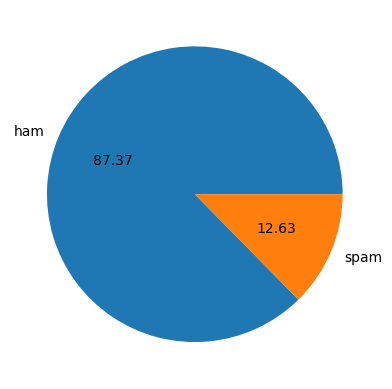

In [115]:
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [116]:
import nltk

In [117]:
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\TUHIN
[nltk_data]     BERA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\TUHIN
[nltk_data]     BERA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [118]:
df["num_character"] = df["text"].apply(len)

In [119]:
df.head(5)

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [120]:
## number of words 
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [121]:
df.head(3)

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [122]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [123]:
df.head(3)

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [124]:
df[["num_character", "num_words", "num_sentences"]].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [125]:
df[df["target"] == 0]

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [126]:
## ham
df[df["target"] == 0][["num_character", "num_words", "num_sentences"]].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [127]:
## spam 
df[df["target"] == 1][["num_character", "num_words", "num_sentences"]].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [128]:
import seaborn as sns

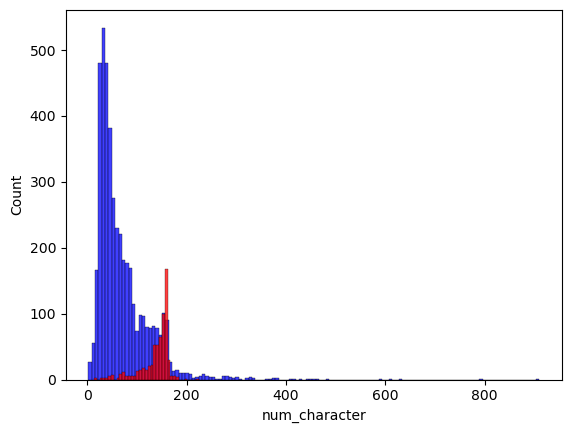

In [129]:
sns.histplot(df[df["target"] == 0]["num_character"], color="blue")
sns.histplot(df[df["target"] == 1]["num_character"], color='red')
plt.show()

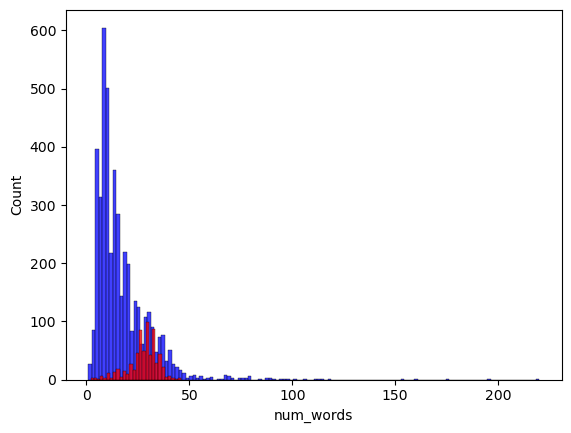

In [130]:
sns.histplot(df[df["target"] == 0]["num_words"], color="blue")
sns.histplot(df[df["target"] == 1]["num_words"], color='red')
plt.show()

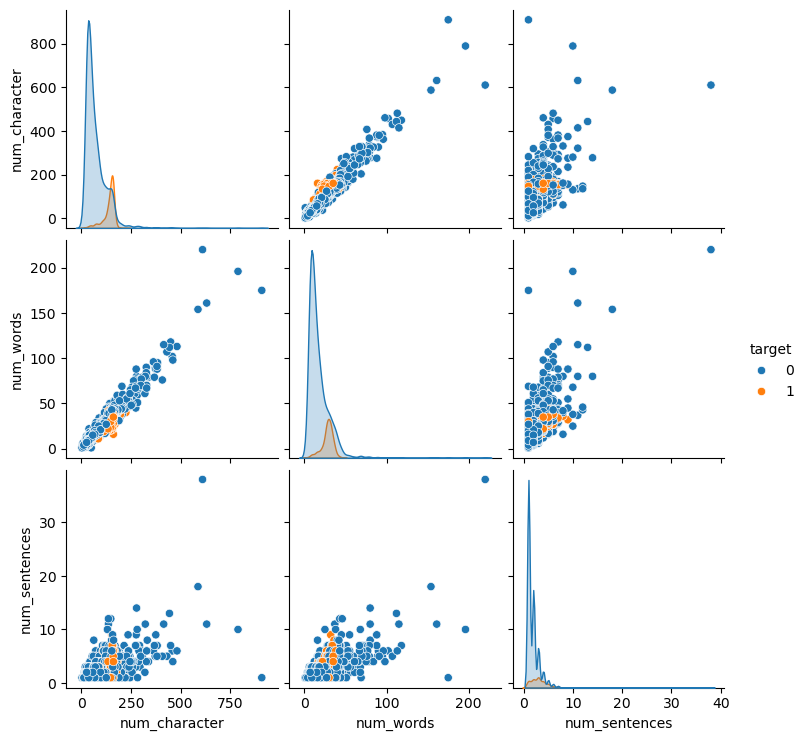

In [131]:
sns.pairplot(df, hue="target")
plt.show()

<Axes: >

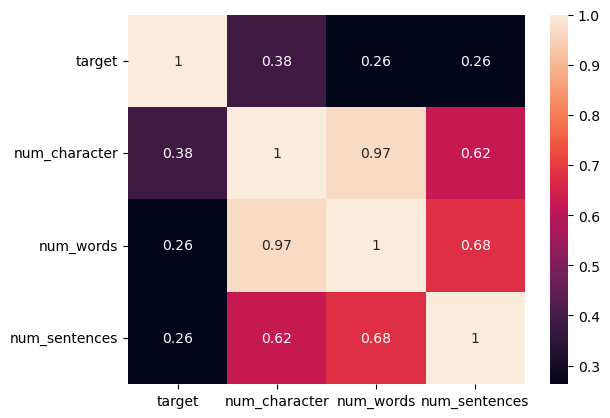

In [132]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data Preprocessing 

In [133]:
## 1.lower case. 1.Tokenization, 3.Removing special character, 4.Removing stop words, 5.stemming

In [134]:
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to C:\Users\TUHIN
[nltk_data]     BERA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
import string

In [136]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords

In [137]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text= y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [138]:
# transform_text("i loves The YT Mechine learning lecture , how about you?%%")

In [139]:
df["transformed_text"] = df["text"].apply(transform_text)

In [140]:
df.head(3)

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [141]:
# !pip install wordcloud

In [142]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [143]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].astype(str).str.cat(sep=" "))

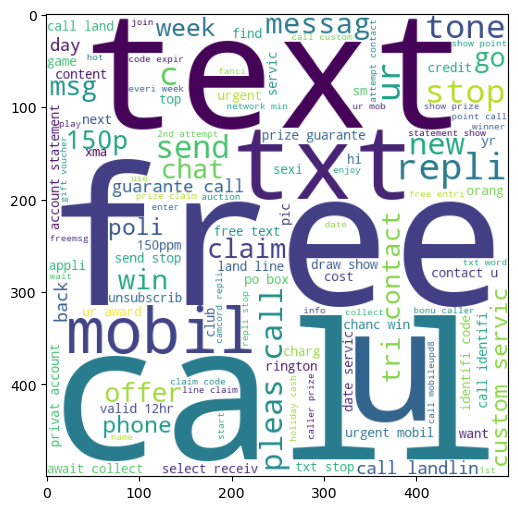

In [144]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [145]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].astype(str).str.cat(sep=" "))

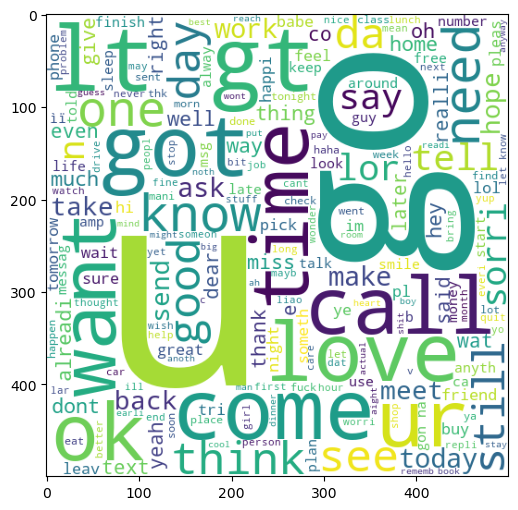

In [146]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [147]:
df.head(3)

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [148]:
df[df["target"] == 1]["transformed_text"]

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [149]:
df[df["target"] == 1]["transformed_text"].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [150]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [151]:
len(spam_corpus)

9939

In [152]:
from collections import Counter
# Counter(spam_corpus)

In [153]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\TUHIN BERA\AppData\Local\Temp\ipykernel_11564\303031466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=top_words, palette='viridis')


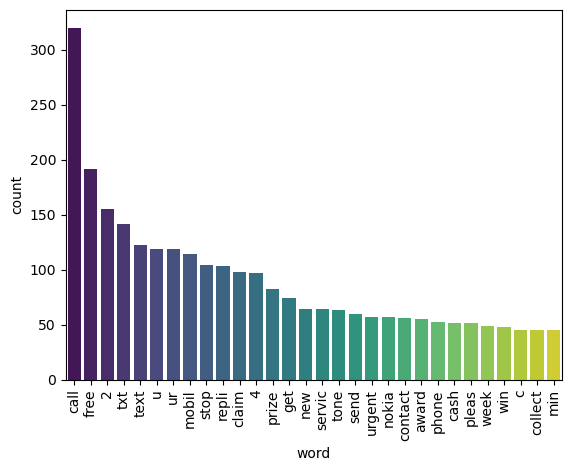

In [154]:
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
sns.barplot(x='word', y='count', data=top_words, palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

In [155]:
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [156]:
len(ham_corpus)

35404

C:\Users\TUHIN BERA\AppData\Local\Temp\ipykernel_11564\912994764.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=top_words, palette='viridis')


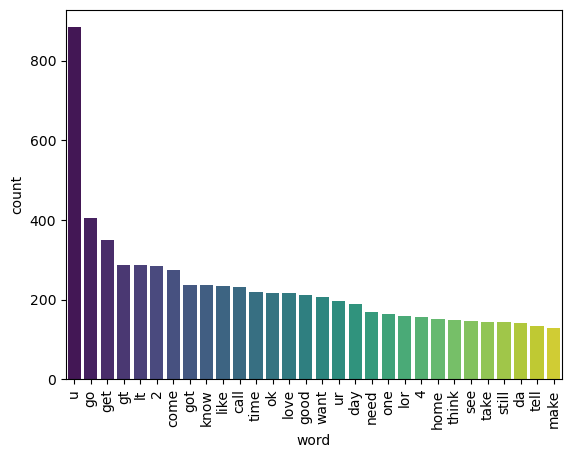

In [157]:
from collections import Counter
# Counter(spam_corpus)

top_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
sns.barplot(x='word', y='count', data=top_words, palette='viridis')
plt.xticks(rotation="vertical")
plt.show()

## Model building

In [158]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [159]:
x = tfidf.fit_transform(df["transformed_text"]).toarray()

In [160]:
x.shape

(5169, 6708)

In [161]:
y = df["target"].values

In [162]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [165]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [166]:
gnb = GaussianNB()
mnb =MultinomialNB()
bnb = BernoulliNB()

In [167]:
gnb.fit(x_train, y_train)

GaussianNB()

In [168]:
y_prd = gnb.predict(x_test) 
print(accuracy_score(y_test, y_prd))
print(confusion_matrix(y_test, y_prd))
print(precision_score(y_test, y_prd))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [169]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [170]:
y_prd2 = mnb.predict(x_test) 
print(accuracy_score(y_test, y_prd2))
print(confusion_matrix(y_test, y_prd2))
print(precision_score(y_test, y_prd2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [171]:
bnb.fit(x_train, y_train)

BernoulliNB()

In [172]:
y_prd3 = bnb.predict(x_test) 
print(accuracy_score(y_test, y_prd3))
print(confusion_matrix(y_test, y_prd3))
print(precision_score(y_test, y_prd3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [173]:
## tfidf --> MNB

### comparing or checking  with other model 

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [192]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty="l1")
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [193]:
clfs = {
    "SVC":svc,
    "KN":knc, 
    "NB":mnb,
    "DT":dtc, 
    "LR":lrc, 
    "RF":rfc, 
    "Adaboost":abc, 
    "BgC":bc, 
    "ETC":etc, 
    "GBDT":gbdt, 
    "XGB":xgb
}

In [194]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    y_prd = clf.predict(X_test)

    accuracy = accuracy_score(Y_test, y_prd)
    precision = precision_score(Y_test, y_prd)

    return accuracy, precision

In [195]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.971953578336557, 0.9393939393939394)

In [196]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)


    print("For", name)
    print("accuracy", current_accuracy)
    print("Precision", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
accuracy 0.971953578336557
Precision 0.9393939393939394
For KN
accuracy 0.8965183752417795
Precision 1.0
For NB
accuracy 0.9613152804642167
Precision 0.9906542056074766
For DT
accuracy 0.9342359767891683
Precision 0.808
For LR
accuracy 0.9439071566731141
Precision 0.865546218487395
For RF
accuracy 0.9700193423597679
Precision 0.9913793103448276
For Adaboost
accuracy 0.9148936170212766
Precision 0.7878787878787878
For BgC
accuracy 0.9613152804642167
Precision 0.8776978417266187
For ETC
accuracy 0.9738878143133463
Precision 0.9916666666666667
For GBDT
accuracy 0.9506769825918762
Precision 0.9519230769230769
For XGB
accuracy 0.9748549323017408
Precision 0.9612403100775194


In [197]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(), "Accuracy":accuracy_scores, "Precision":precision_scores})
performance_df = performance_df.sort_values(by="Precision", ascending=False)

In [198]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
8,ETC,0.973888,0.991667
5,RF,0.970019,0.991379
2,NB,0.961315,0.990654
10,XGB,0.974855,0.961240
9,GBDT,0.950677,0.951923
0,SVC,0.971954,0.939394
7,BgC,0.961315,0.877698
4,LR,0.943907,0.865546
3,DT,0.934236,0.808000


In [200]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [201]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,ETC,Accuracy,0.973888
2,RF,Accuracy,0.970019
3,NB,Accuracy,0.961315
4,XGB,Accuracy,0.974855
5,GBDT,Accuracy,0.950677
6,SVC,Accuracy,0.971954
7,BgC,Accuracy,0.961315
8,LR,Accuracy,0.943907
9,DT,Accuracy,0.934236


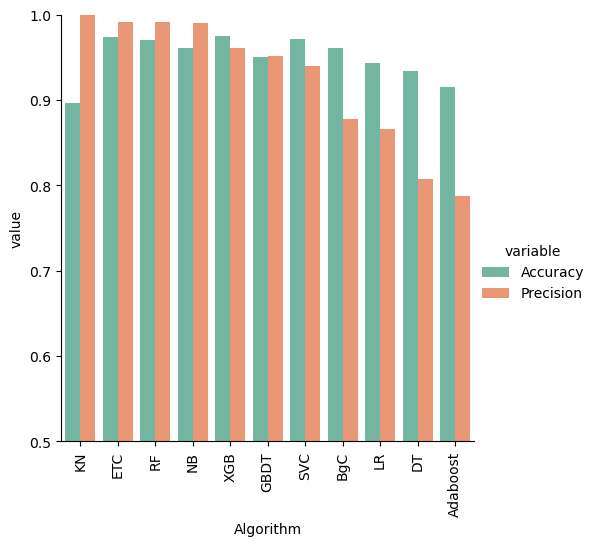

In [203]:
sns.catplot(
    x="Algorithm",
    y="value",
    hue="variable",
    data=performance_df1,
    kind="bar",
    height=5,
    palette="Set2"   # you can try 'viridis', 'coolwarm', etc.
)

plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.show()


## Model improve

In [204]:
## change the max_features parameters of TFIDF

In [205]:
## But scaling of x (minmaxscaling) will not increase the accuracy

In [206]:
## Extracking pkl file

In [208]:
# import pickle
# pickle.dump(tfidf, open("vectorization.pkl", "wb"))
# pickle.dump(etc, open("model.pkl", "wb"))